In [ ]:
pip install sklearn
pip install pandas

     |████████████████████████████████| 23.2 MB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 306 kB 45.1 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=6e57abe52a2952506adb4a59a8b6de2696f2db85c1b913ae062cf23af603614d
  Stored in directory: /home/jovyan/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Import
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
import numpy as np

In [ ]:
#Komórka na importy
file_name = 'dane.csv'
model_type = 'DTR'

In [ ]:
# ujednolicenie zmiennych
df = pd.read_csv(file_name)
predictions = pd.DataFrame()
#Tymczasowy podział danych
from sklearn.model_selection import train_test_split
    
X, y = df.drop(columns=['y']).to_numpy(),df['y'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state=1)

# Podział Danych za pomocą GA (Adrian)
#TODO
# proszę nazwij ostatecznie podział tak jak w tymczasowym podziale

#Model MLR (Paula)
#TODO
#predictions['MLR'] = y_pred

#Model KNN (Paula)
#TODO
#predictions['KNN'] = y_pred

# Model RF (Ada)
#TODO
#predictions['RF'] = y_pred

# Model SVR (Ada)
#TODO
#predictions['SVR'] = y_pred

# Model DTR (Michał)
DTR = sk.tree.DecisionTreeRegressor()
DTR = DTR.fit(X_train, y_train)
y_pred = DTR.predict(X_test)
predictions['DTR'] = y_pred
print(np.mean(y_test - y_pred))

3.1262063904035275


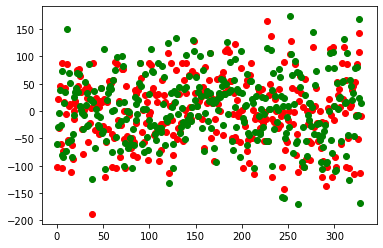

In [ ]:
#Output (wykresiki Michał)
y_pred = predictions[model_type]
x = [i for i in range(len(y_pred))]
plt.scatter(x,y_pred, color = 'red')
plt.scatter(x,y_test, color = 'green')
plt.show()